Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6896 - mean_absolute_error: 0.2972 - val_loss: 0.6995 - val_mean_absolute_error: 0.2829
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7377 - mean_absolute_error: 0.2875 - val_loss: 0.6945 - val_mean_absolute_error: 0.2758
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5761 - mean_absolute_error: 0.4134 - val_loss: 0.6891 - val_mean_absolute_error: 0.2715
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2888 - mean_absolute_error: 0.3617 - val_loss: 0.6840 - val_mean_absolute_error: 0.2663
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3861 - mean_absolute_error: 0.3737 - val_loss: 0.6791 - val_mean_absolute_error: 0.2634
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8539 - mean_absolute_error: 0.2817 - val_loss: 0.6741 - val_mean_absolute_error: 0.2584
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8050 - mean_absolute_error: 0.2648 - val_loss: 0.6694 - val_mean_absol

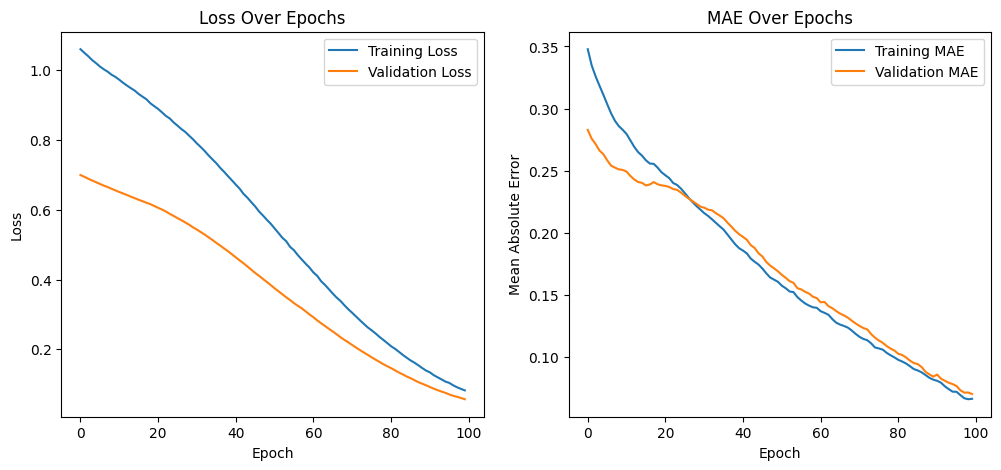

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('state_year_totals_electrci.csv')

# One-hot encoding the 'State' column
encoder = OneHotEncoder(sparse=False)
state_encoded = encoder.fit_transform(data[['State']])

# Normalize 'Year' and 'Total Vehicles'
scaler = StandardScaler()
year_scaled = scaler.fit_transform(data[['Year']])
vehicles_scaled = scaler.fit_transform(data[['Total Vehicles']])

# Combine the features into one array
X = np.hstack((state_encoded, year_scaled))
y = vehicles_scaled.ravel()  # Flatten to 1D array for the target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)  # No activation function for regression output
])

# Compile the model with mean squared error loss for regression
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Training the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model and output the final evaluation metrics
final_loss, final_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Final Loss: {final_loss}, Final MAE: {final_mae}')

# Optionally, plot the loss and MAE
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


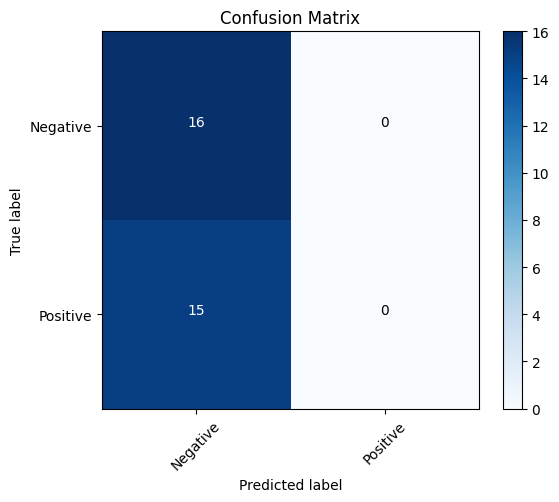

In [5]:
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

plt.tight_layout()
plt.show()